In [1]:
!git clone https://github.com/AJITKUMAR130012/u_net_image_seg.git

Cloning into 'u_net_image_seg'...
remote: Enumerating objects: 3381, done.
remote: Counting objects: 100% (482/482), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 3381 (delta 392), reused 427 (delta 340), pack-reused 2899
Receiving objects: 100% (3381/3381), 210.25 MiB | 10.27 MiB/s, done.
Resolving deltas: 100% (1819/1819), done.
Updating files: 100% (2912/2912), done.


In [2]:
!pwd

/content


In [3]:
!ls

sample_data  u_net_image_seg


In [4]:
%cd u_net_image_seg

/content/u_net_image_seg


In [5]:
!ls

mask  train


In [10]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import pickle
import os
import tensorflow as tf
import os
import random
import numpy as np
 
from tqdm import tqdm 


from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [16]:
img_path=os.listdir("./train")
size_x=128
size_y=128
print(len(img_path))

1456


In [8]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [11]:
TRAIN_PATH = 'train/'
#TEST_PATH = 'stage1_test/'

In [12]:
train_ids = next(os.walk(TRAIN_PATH))[1]
#test_ids = next(os.walk(TEST_PATH))[1]

In [15]:
print(len(train_ids))

0


In [29]:
X_train = np.zeros((len(img_path), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(img_path), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)

<ipython-input-29-34df9476cb56>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  Y_train = np.zeros((len(img_path), IMG_HEIGHT, IMG_WIDTH, 1), dtype=np.bool)


In [30]:
# preparing the training images
train_img=[]
i=0
cur_path="./train"
for img in img_path:
    #print(img)
    img=os.path.join(cur_path,img)
    img1=cv2.imread(img)
    img1=cv2.resize(img1,(size_y,size_x))
    img1=cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    train_img.append(img1)
    X_train[i]=img1
    i=i+1

In [31]:
train_img=np.array(train_img)

In [32]:
mask_path=os.listdir("./mask")

In [33]:
 #preparing the mask images
train_mask=[]
i=0
cur_path="./mask"
for img in mask_path:
    #print(img)
    img=os.path.join(cur_path,img)
    img1=cv2.imread(img,0)
    #img1=cv2.resize(img1,(size_y,size_x))
    img1= np.expand_dims(resize(img1, (IMG_HEIGHT, IMG_WIDTH), mode='constant',  
                                      preserve_range=True), axis=-1)

    train_mask.append(img1)
    Y_train[i]=img1
    i=i+1

In [54]:
train_mask=np.array(train_mask)

In [55]:
train_img.shape, train_mask.shape

((1456, 128, 128, 3), (1456, 128, 128, 1))

In [56]:
X_train.shape,Y_train.shape

((1456, 128, 128, 3), (1456, 128, 128, 1))

In [57]:
type(X_train),type(Y_train), type(train_img),type(train_mask)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [58]:
X_train.dtype,Y_train.dtype, train_img.dtype, train_mask.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('float64'))

In [59]:
Y_train=Y_train.astype(np.uint8)

In [60]:
X_train.dtype,Y_train.dtype, train_img.dtype, train_mask.dtype

(dtype('uint8'), dtype('uint8'), dtype('uint8'), dtype('float64'))

In [61]:
image_x = random.randint(0, train_img.shape[0])


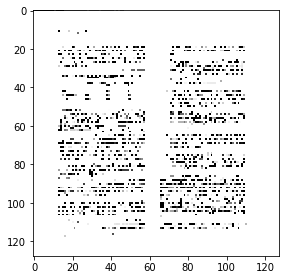

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


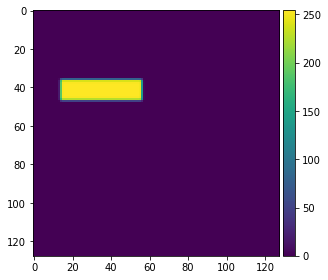

In [62]:
imshow(train_img[image_x])
plt.show()
imshow(np.squeeze(train_mask[image_x]))
plt.show()

In [63]:

inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

In [64]:
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)

c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)

p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)

c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)

p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)

c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)

p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)

c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)

p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)

c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)


#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)

c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)

c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)

c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

 
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)

 
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

 
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 128, 128, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_19 (Conv2D)             (None, 128, 128, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

In [48]:
# X_train=train_img
# y_train=train_mask
#y_train = np.expand_dims(y_train, axis=3)

In [ ]:
# checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)

# callbacks = [
#         tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
#         tf.keras.callbacks.TensorBoard(log_dir='logs')]

In [66]:
################################
#Modelcheckpoint


results = model.fit(X_train, Y_train, validation_split=0.2, batch_size=16, epochs=25)


Epoch 1/25
73/73 [==============================] - 3s 43ms/step - loss: 0.5122 - accuracy: 0.7075 - val_loss: 0.5650 - val_accuracy: 0.6431
Epoch 2/25
73/73 [==============================] - 3s 42ms/step - loss: 0.5072 - accuracy: 0.7128 - val_loss: 0.5224 - val_accuracy: 0.7157
Epoch 3/25
73/73 [==============================] - 3s 43ms/step - loss: 0.4840 - accuracy: 0.7452 - val_loss: 0.5023 - val_accuracy: 0.7340
Epoch 4/25
73/73 [==============================] - 3s 43ms/step - loss: 0.4353 - accuracy: 0.7895 - val_loss: 0.4142 - val_accuracy: 0.8004
Epoch 5/25
73/73 [==============================] - 3s 42ms/step - loss: 0.3494 - accuracy: 0.8470 - val_loss: 0.2912 - val_accuracy: 0.8805
Epoch 6/25
73/73 [==============================] - 3s 42ms/step - loss: 0.2775 - accuracy: 0.8882 - val_loss: 0.2520 - val_accuracy: 0.8967
Epoch 7/25
73/73 [==============================] - 3s 43ms/step - loss: 0.2491 - accuracy: 0.8989 - val_loss: 0.2280 - val_accuracy: 0.9103
Epoch 8/25
73

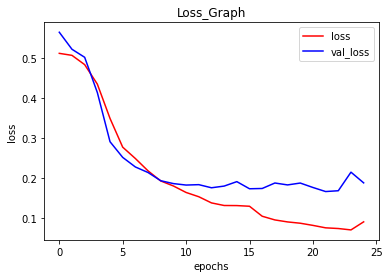

In [67]:
plt.plot(results.history['loss'],c='r',label="loss")
plt.plot(results.history['val_loss'],c='b',label="val_loss")
plt.xlabel("epochs")
plt.title("Loss_Graph")
plt.ylabel("loss")
plt.legend()
plt.show()

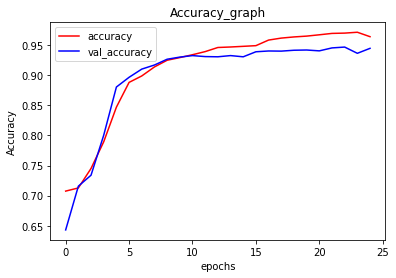

In [68]:
plt.plot(results.history['accuracy'],c='r',label="accuracy")
plt.plot(results.history['val_accuracy'],c='b',label="val_accuracy")
plt.xlabel("epochs")
plt.title("Accuracy_graph")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
plt.show()

In [75]:
test=cv2.imread("/content/cTDaR_t10019_jpg.rf.d7437d61f546599c5d09ea267bc78eae.jpg")
test.shape

(416, 416, 3)

In [76]:
test= np.expand_dims(resize(test, (IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), mode='constant',  
                                      preserve_range=True), axis=-1)

In [77]:
test.shape

(128, 128, 3, 1)

In [86]:
#output=model.predict(test)

In [79]:
X_train.shape

(1456, 128, 128, 3)

In [80]:
X_train[:int(X_train.shape[0]*0.9)].shape

(1310, 128, 128, 3)

In [81]:
idx = random.randint(0, len(X_train))


preds_train = model.predict(X_train[:int(X_train.shape[0]*0.9)], verbose=1)
preds_val = model.predict(X_train[int(X_train.shape[0]*0.9):], verbose=1)
#preds_test = model.predict(X_test, verbose=1)

5/5 [==============================] - 1s 126ms/step


In [82]:
preds_train_t = (preds_train > 0.5).astype(np.uint8)
preds_val_t = (preds_val > 0.5).astype(np.uint8)

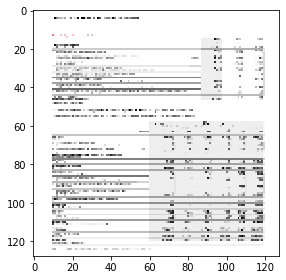

In [83]:
# Perform a sanity check on some random training samples
ix = random.randint(0, len(preds_train_t))
imshow(X_train[ix])
plt.show()

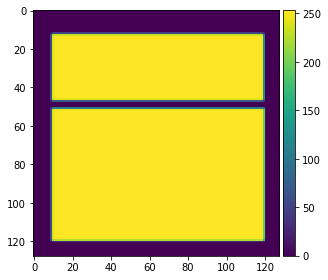

In [84]:
imshow(np.squeeze(y_train[ix]))
plt.show()

/usr/local/lib/python3.8/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


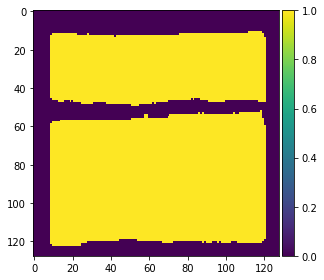

In [85]:
imshow(np.squeeze(preds_train_t[ix]))
plt.show()

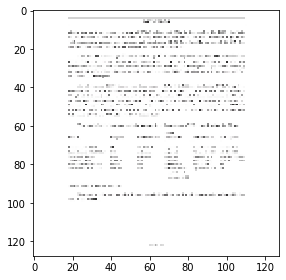

In [87]:

# Perform a sanity check on some random validation samples
ix = random.randint(0, len(preds_val_t))
imshow(X_train[int(X_train.shape[0]*0.9):][ix])
plt.show()

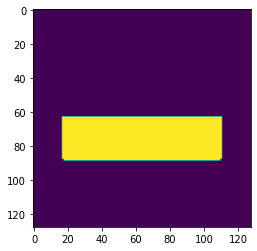

In [89]:
plt.imshow(np.squeeze(Y_train[int(Y_train.shape[0]*0.9):][ix]))
plt.show()

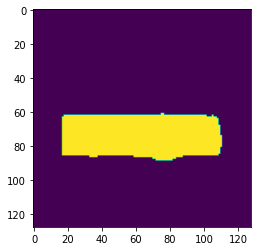

In [90]:
plt.imshow(np.squeeze(preds_val_t[ix]))
plt.show()